To get LDA model quickly, without running everything, execute 1st three cells, the 2nd cell below "Second round of ML Training" to the end of the section. Make sure to comment out save statements.

In [1]:
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
%matplotlib inline

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
catalog = np.loadtxt("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2010ae/sn2010ae.phot")

In [3]:
# Removes points with nan. It is assumed that these are all magnitude measurements, so they are set to their max.
flat = catalog.flatten()
for i in range(flat.size):
    if (np.isnan(flat[i])) or (not np.isfinite(flat[i])):
        catalog[i//271][i%271] = 99.999
        print(i)

111397
111423
111436
111488
111592
111644
187845
188040
190826
191021
203563
203745
207873
207899
207912
207925
208029
208081
216300
216495
231179
231205
231218
231231
231335
231387
241232
241427
255053
255248
256137
256358
302723
302749
302762
302814
302918
302970
303291
303512
304620
304646
304659
304685
304789
304841
318467
318688
342586
342781
440688
440883
460742
460924
466975
467196
489468
489650
494346
494541
496759
496785
496798
496811
496915
496967
509251
509433
517110
517331
537164
537346
570226
570421
588654
588875
593532
593740
594616
594798
606811
607019
609250
609445
634724
634906
637705
637913
637950
637976
637989
638028
638132
638184
639060
639242
639268
655565
655591
655604
655656
655760
655812
655862
656057
659656
659838
664263
664445
679955
679981
679994
680007
680033
680111
680137
680163
680189
685130
685338
692718
692913
692989
693210
700577
700759
704100
704321
714127
714309
727109
727135
727148
727200
727304
727356
729277
729303
729316
729342
729368
729446
729498

In [320]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/First_Training_Set.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
regionX = np.zeros(871)
regionY = np.zeros(871)
key = []
for i in range(871):
    A = mysplit(text[i+3], ' # ')
    regionX[i] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    regionY[i] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
    if A[1][-3] == 'l':
        key.append('green')
    elif A[1][-3] == 'u':
        key.append('blue')
    else:
        print("Error: neither blue nor green")

# Creates a array with a space for each object in the catalog, to contain only X,Y positions
positions = np.zeros([np.shape(catalog)[0], 2])
allinfo = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks for a S/N ratio of 50 or greater (to be lowered later)
    if ((catalog[i][5] >= 50)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)):
        positions[j][0] = catalog[i][2] # Assigns X position with offset
        positions[j][1] = catalog[i][3] # Assigns Y position with offset
        allinfo[j] = catalog[i]
        j = j + 1

# Trims all zeros from end of positions array, left from objects with low S/N
pos = positions[~np.all(positions == 0, axis=1)]
info = allinfo[~np.all(allinfo == 0, axis=1)]

In [321]:
# Gets rid of extra point in info
print(pos[317])
print(regionX[317])
print(regionY[317])

front = info[:317]
back = info[318:]
info = np.append(front,back,0)

[ 3222.55   806.78]
1753.25
1979.23


In [322]:
dataset = pandas.DataFrame(info)
dataset[271] = key

array = dataset.values
X = array[:,0:271]
Y = array[:,271]
validation_size = 0.20
seed = 7

In [323]:
flat = X.flatten()
for i in range(flat.size):
    if (np.isnan(flat[i])) or (not np.isfinite(flat[i])):
        print(i//271)
        print(i%271)

In [324]:
# Replaces values which were previously NaN
X[379][224] = 99.999
X[379][42] = 99.999

X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
                                                    test_size=validation_size, random_state=seed)

In [325]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 13
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.870745 (0.035381)


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn

LDA: 0.821801 (0.043666)
KNN: 0.898033 (0.030214)
CART: 0.856253 (0.026163)
NB: 0.843437 (0.057535)
SVM: 0.814845 (0.066422)


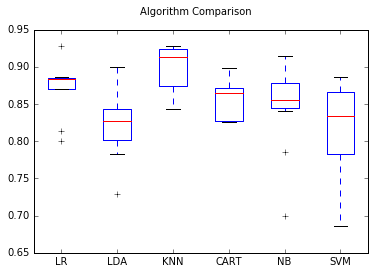

0.931428571429
[[  7  12]
 [  0 156]]
             precision    recall  f1-score   support

       blue       1.00      0.37      0.54        19
      green       0.93      1.00      0.96       156

avg / total       0.94      0.93      0.92       175



In [335]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [165]:
cat_predictions=knn.predict(catalog) # Contains the predicted good/bad points

In [224]:
pos_predict = np.zeros((catalog.shape[0],2))
info_predict = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 20     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 20)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)&(cat_predictions[i] == 'green')):
        pos_predict[j][0] = catalog[i][2] # Assigns X position
        pos_predict[j][1] = catalog[i][3] # Assigns Y position
        info_predict[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict = pos_predict[~np.all(pos_predict == 0, axis=1)]
info_predict = info_predict[~np.all(info_predict == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/First_Prediction.reg", pos_predict, '%5.2f')

## Second Round of ML Training

In [507]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/Second_Training_Set.reg", "r+")

text = asci.readlines()
regionX = np.zeros(2659)
regionY = np.zeros(2659)
key = []
for i in range(2659):
    A = mysplit(text[i+3], ' # ')
    regionX[i] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    regionY[i] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
    if A[1][-3] == 'l':
        key.append('green')
    elif A[1][-3] == 'u':
        key.append('blue')
    else:
        print("Error: neither blue nor green")

# Creates a array with a space for each object in the catalog, to contain only X,Y positions
pos2 = np.zeros([np.shape(info_predict)[0], 2])
info2 = np.zeros(np.shape(info_predict))

for k in range(regionX.size): # Cycles through each region item
    for i in range(info_predict.shape[0]): # Cycles through each info item produced in predictions above
        if (round(regionX[k],2) == round(pos_predict[i][0],2))&(round(regionY[k],2) == round(pos_predict[i][1],2)):
            pos2[k][0] = pos_predict[i][0] # Assigns X position
            pos2[k][1] = pos_predict[i][1] # Assigns Y position
            info2[k] = info_predict[i]
            break

# Trims all zeros from end of positions array
pos2 = pos2[~np.all(pos2 == 0, axis=1)]
info2 = info2[~np.all(info2 == 0, axis=1)]

In [4]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/Second_Training_Set.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
regionX = np.zeros(2659)
regionY = np.zeros(2659)
key = []
for i in range(2659):
    A = mysplit(text[i+3], ' # ')
    regionX[i] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    regionY[i] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
    if A[1][-3] == 'l':
        key.append('green')
    elif A[1][-3] == 'u':
        key.append('blue')
    else:
        print("Error: neither blue nor green")

# Creates a array with a space for each object in the catalog, to contain only X,Y positions
pos2 = np.zeros([np.shape(catalog)[0], 2])
info2 = np.zeros(np.shape(catalog))

for k in range(regionX.size): # Cycles through each region item
    for i in range(catalog.shape[0]): # Cycles through each info item produced in predictions above
        if (round(regionX[k],2) == round(catalog[i][2],2))&(round(regionY[k],2) == round(catalog[i][3],2)):
            pos2[k][0] = catalog[i][2] # Assigns X position
            pos2[k][1] = catalog[i][3] # Assigns Y position
            info2[k] = catalog[i]
            break

# Trims all zeros from end of positions array
pos2 = pos2[~np.all(pos2 == 0, axis=1)]
info2 = info2[~np.all(info2 == 0, axis=1)]

In [5]:
dataset = pandas.DataFrame(info2)
dataset[271] = key

array = dataset.values
X = array[:,0:271]
Y = array[:,271]
validation_size = 0.20
seed = 17

In [6]:
flat = X.flatten()
for i in range(flat.size):
    if (np.isnan(flat[i])) or (not np.isfinite(flat[i])):
        print(i//271)
        print(i%271)
        X[i//271][i%271] = 99.999

In [7]:
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
                                                    test_size=validation_size, random_state=seed)

In [8]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 19
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=44, weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.864609 (0.013979)


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn

LDA: 0.874491 (0.018321)
KNN: 0.854267 (0.021330)
CART: 0.822300 (0.021895)
NB: 0.836418 (0.023861)
SVM: 0.811936 (0.027338)


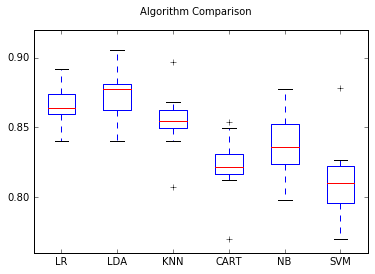

0.885338345865
[[ 50  44]
 [ 17 421]]
             precision    recall  f1-score   support

       blue       0.75      0.53      0.62        94
      green       0.91      0.96      0.93       438

avg / total       0.88      0.89      0.88       532



//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [9]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [9]:
cat_predictions2=lda.predict(catalog) # Contains the predicted good/bad points

In [10]:
pos_predict2 = np.zeros((catalog.shape[0],2))
info_predict2 = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 10     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((catalog[i][5] >= 10)&(abs(catalog[i][6]) < .25)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)&(cat_predictions2[i] == 'green')):
        pos_predict2[j][0] = catalog[i][2] # Assigns X position
        pos_predict2[j][1] = catalog[i][3] # Assigns Y position
        info_predict2[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict2 = pos_predict2[~np.all(pos_predict2 == 0, axis=1)]
info_predict2 = info_predict2[~np.all(info_predict2 == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/Second_Prediction.reg", pos_predict2, '%5.2f')

## Final Candidates

In [3]:
# Save model
import pickle
from sklearn.externals import joblib
#joblib.dump(lda, 'LDA_Model.pkl')
lda = joblib.load('LDA_Model.pkl')

//anaconda/lib/python3.5/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearDiscriminantAnalysis from version pre-0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: The file 'LDA_Model.pkl' has been generated with a joblib version less than 0.10. Please regenerate this pickle file.


In [4]:
pos_predict4 = np.zeros((catalog.shape[0],2))
info_predict4 = np.zeros(np.shape(catalog))

j = 0 # Iteration variable for positions array
for i in range(catalog.shape[0]): # Cycles through each object in catalog
    # Checks to make sure point is "good"
    # Good defined by: 1. S/N > 3     2. Sharpness < .25     3. Roundness < 1     4. Crowding < .1 
    #                  5. Object type = "Bright Star"     6. ML algorithm picks as good
    if ((abs(catalog[i][6]) < .3)&(abs(catalog[i][7]) < 1)
        &(catalog[i][9] < .1)&(catalog[i][10] == 1)):
        pos_predict4[j][0] = catalog[i][2] # Assigns X position
        pos_predict4[j][1] = catalog[i][3] # Assigns Y position
        info_predict4[j] = catalog[i]
        j = j + 1
                
# Trims all zeros from end of positions array, left from "bad" objects
pos_predict4 = pos_predict4[~np.all(pos_predict4 == 0, axis=1)]
info_predict4 = info_predict4[~np.all(info_predict4 == 0, axis=1)]

# Saves high S/N object X,Y positions
np.savetxt("New_Start(2017)/sn2010ae_Prediction.reg", pos_predict4, '%5.2f')
print(pos_predict4.shape)

(7705, 2)


## Color Magnitude Diagrams

In [5]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010ae_200pc.reg", "r+")

def mysplit(s, delim=None):
    return [x for x in s.split(delim) if x]

text = asci.readlines()
region = np.zeros([47,2])
for i in range(47):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

# Info for each star chosen as real 
infoF3 = np.zeros([region.shape[0],info_predict4.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict4.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict4[i][0])&(region[j][1] == pos_predict4[i][1]):
        infoF3[j] = info_predict4[i]
        j = j + 1
        if j == region.shape[0]: break

In [6]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010ae_133pc.reg", "r+")

text = asci.readlines()
region = np.zeros([23,2])
for i in range(23):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF2 = np.zeros([region.shape[0], info_predict4.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF3.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF3[i][2:4]):
        infoF2[j] = infoF3[i]
        j = j + 1
        if j == region.shape[0]: break

In [7]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010ae_67pc.reg", "r+")

text = asci.readlines()
region = np.zeros([5,2])
for i in range(5):
    A = mysplit(text[i+3], ' # ')
    if A[1][-2] == 'w':
        region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
        region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]
region = region[~np.all(region == 0, axis=1)]

infoF1 = np.zeros([region.shape[0], info_predict4.shape[1]])

j = 0 # Iteration variable for region array
for i in range(infoF2.shape[0]): # Cycles through each star predicted above
    if np.array_equal(region[j],infoF2[i][2:4]):
        infoF1[j] = infoF2[i]
        j = j + 1
        if j == region.shape[0]: break

[-0.5, 3, 28, 20]

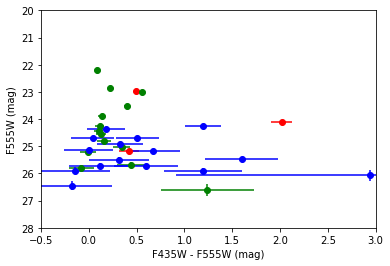

In [8]:
for i in range(infoF3.shape[0]):
    for j in range(infoF2.shape[0]):
        if np.array_equal(infoF3[i],infoF2[j]):
            infoF3[i] = np.zeros(infoF3[i].size)
for i in range(infoF2.shape[0]):
    for j in range(infoF1.shape[0]):
        if np.array_equal(infoF2[i],infoF1[j]):
            infoF2[i] = np.zeros(infoF2[i].size)

infoF2 = infoF2[~np.all(infoF2 == 0, axis=1)]
infoF3 = infoF3[~np.all(infoF3 == 0, axis=1)]
# F555W vs F435W - F555W
F435W_F1 = infoF1[:,15]
xerr_F1 = np.sqrt(infoF1[:,17]**2 + infoF1[:,30]**2)
F555W_F1 = infoF1[:,28]
yerr_F1 = infoF1[:,30]

F435W_F2 = infoF2[:,15]
xerr_F2 = np.sqrt(infoF2[:,17]**2 + infoF2[:,30]**2)
F555W_F2 = infoF2[:,28]
yerr_F2 = infoF2[:,30]

F435W_F3 = infoF3[:,15]
xerr_F3 = np.sqrt(infoF3[:,17]**2 + infoF3[:,30])
F555W_F3 = infoF3[:,28]
yerr_F3 = infoF3[:,30]

line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)

#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F435W - F555W (mag)')
plt.ylabel('F555W (mag)')
plt.axis([-.5,3,28,20])

[-0.5, 2, 27, 20]

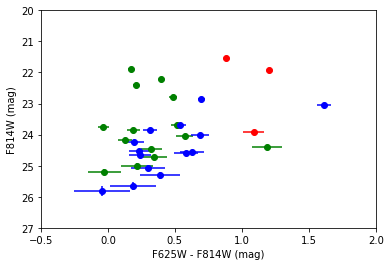

In [9]:
F625W_F1 = infoF1[:,41]
xerr2_F1 = np.sqrt(infoF1[:,43]**2 + infoF1[:,56]**2)
F814W_F1 = infoF1[:,54]
yerr2_F1 = infoF1[:,56]

F625W_F2 = infoF2[:,41]
xerr2_F2 = np.sqrt(infoF2[:,43]**2 + infoF2[:,56]**2)
F814W_F2 = infoF2[:,54]
yerr2_F2 = infoF2[:,56]

F625W_F3 = infoF3[:,41]
xerr2_F3 = np.sqrt(infoF3[:,43]**2 + infoF3[:,56]**2)
F814W_F3 = infoF3[:,54]
yerr2_F3 = infoF3[:,56]

line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)

#plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F625W - F814W (mag)')
plt.ylabel('F814W (mag)')
plt.axis([-.5,2,27,20])

[-1, 3, 3, -1]

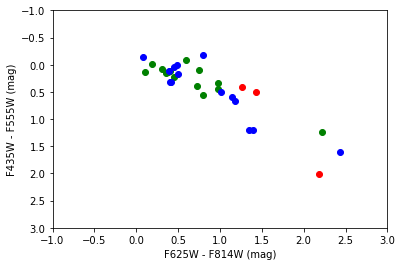

In [10]:
# Color-color plot to find clusters
plt.plot(F555W_F1 - F814W_F1, F435W_F1 - F555W_F1, 'ro', F555W_F2 - F814W_F2,  F435W_F2 - F555W_F2, 'go',
         F555W_F3 - F814W_F3,  F435W_F3 - F555W_F3, 'bo')
plt.gca().invert_yaxis()
plt.xlabel('F625W - F814W (mag)')
plt.ylabel('F435W - F555W (mag)')
plt.axis([-1,3,3,-1])

In [11]:
%matplotlib inline
import os
import glob
import matplotlib as mpl

mist_dir = "/Users/tktakaro/Documents/Type-Iax-HST/MIST_v1.0_HST_ACSWF"
# All of this MIST isochrone code comes from Asher

In [12]:
kwargs = {"names": ["EEP", "log10_isochrone_age_yr", "initial_mass", "log_Teff", "log_g",
                    "log_L", "z_surf", "ACS_WFC_F435W", "ACS_WFC_F475W", "ACS_WFC_F502N",
                    "ACS_WFC_F550M", "ACS_WFC_F555W", "ACS_WFC_F606W", "ACS_WFC_F625W", 
                    "ACS_WFC_F658N", "ACS_WFC_F660N", "ACS_WFC_F775W", "ACS_WFC_F814W",
                    "ACS_WFC_F850LP", "ACS_WFC_F892N", "phase"],
         "delim_whitespace": True, "comment": "#"}
isochrones = {}
for filename in glob.glob(mist_dir + "/*.iso.cmd"):
    feh_string = filename.split("/")[-1].split("_")[3] # Pulls metalicity information
    if feh_string[0] == "p":
        feh = float(feh_string[1:]) # feh is [Fe/H]
    elif feh_string[0] == "m":
        feh = -float(feh_string[1:])
    else:
        raise ValueError
    df = pandas.read_csv(filename, **kwargs)
    df['ages'] = 10 ** df.log10_isochrone_age_yr / 1e9
    isochrones[feh] = df # Creates dictionary accessible by entering a particular metalicity

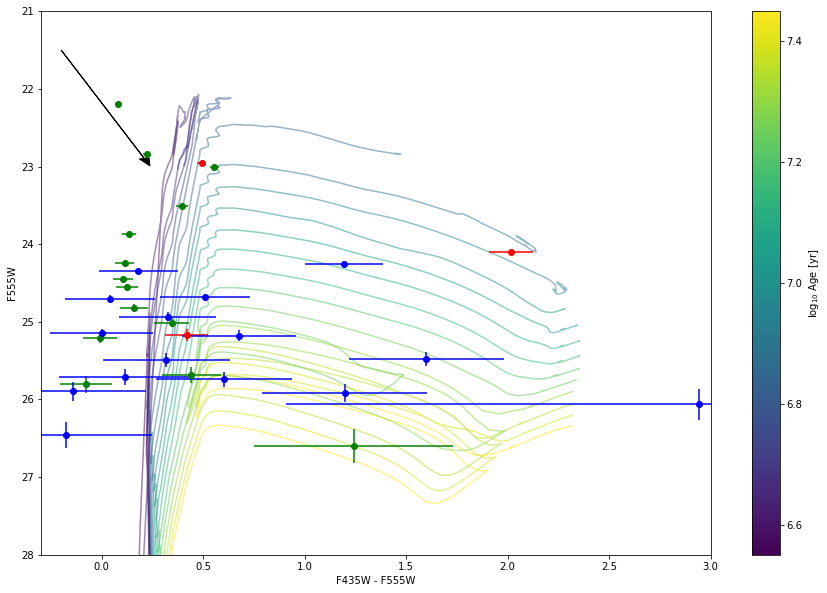

In [13]:
# fix metallicity, vary age
df = isochrones[-0.75]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

#ages = ages[(np.log10(5e8) < ages) & (ages < np.log10(14e9))]
ages = ages[(ages > 6.5) & (ages < 7.5)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(11.0873e6) - 1)
    F435W_ext = .509 # extinction in F435W in ESO 162-17 from NED
    F555W_ext = .394 # extinction in F555W in ESO 162-17 from NED
    Gal_ext = .50 # (B - V) galactic extinction from Stritzinger et.al. 2013
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F435W_F1 - F555W_F1, F555W_F1, fmt='ro', xerr=xerr_F1, yerr=yerr_F1)
line2 = plt.errorbar(F435W_F2 - F555W_F2, F555W_F2, fmt='go', xerr=xerr_F2, yerr=yerr_F2)
line3 = plt.errorbar(F435W_F3 - F555W_F3, F555W_F3, fmt='bo', xerr=xerr_F3, yerr=yerr_F3)
#plt.plot(F435W_F1 - F555W_F1, F555W_F1, 'ro', F435W_F2 - F555W_F2, F555W_F2, 'go', F435W_F3 - F555W_F3, F555W_F3, 'bo')
# Plots reddening vector
plt.arrow(-.2, 21.5, (3.610 - 2.792)*Gal_ext, 2.792*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')


plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(28,21)
plt.xlim(-.3, 3)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

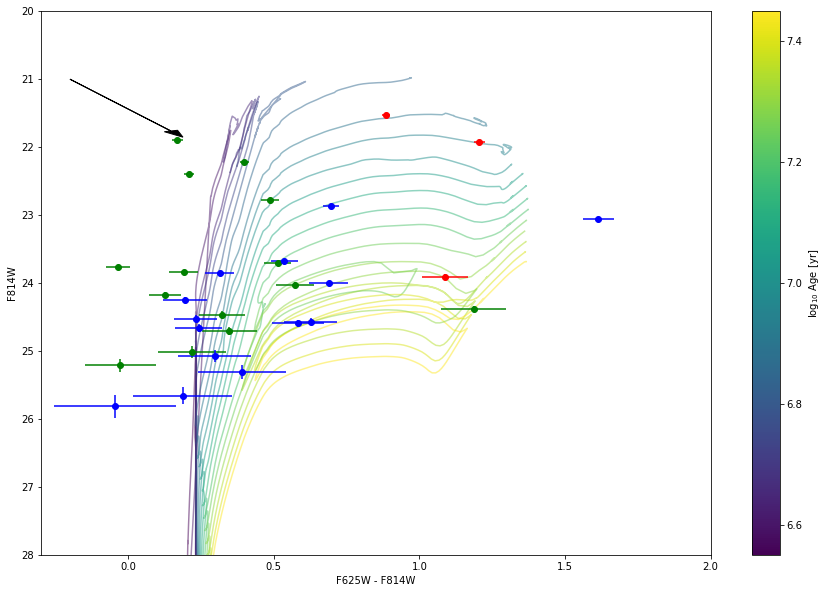

In [14]:
# fix metallicity, vary age
df = isochrones[-0.75]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

#ages = ages[(np.log10(5e8) < ages) & (ages < np.log10(14e9))]
ages = ages[(ages > 6.5) & (ages < 7.5)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F625W_ext = .313 # extinction in F625W in ESO 162-17 from NED
    F814W_ext = .215 # extinction in F814W in ESO 162-17 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
# Plots stars
line1 = plt.errorbar(F625W_F1 - F814W_F1, F814W_F1, fmt='ro', xerr=xerr2_F1, yerr=yerr2_F1)
line2 = plt.errorbar(F625W_F2 - F814W_F2, F814W_F2, fmt='go', xerr=xerr2_F2, yerr=yerr2_F2)
line3 = plt.errorbar(F625W_F3 - F814W_F3, F814W_F3, fmt='bo', xerr=xerr2_F3, yerr=yerr2_F3)
#plt.plot(F625W_F1 - F814W_F1, F814W_F1, 'ro', F625W_F2 - F814W_F2, F814W_F2, 'go', F625W_F3 - F814W_F3, F814W_F3, 'bo')
# Plots reddening vector
plt.arrow(-.2, 21, (2.219 - 1.526)*Gal_ext, 1.526*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(28,20)
plt.xlim(-.3, 2)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

# Removing clusters

In [49]:
# Using IRAF to compute actual concentration index, i.e. photometry at .5 pixels to photometry at 3 pixels
ascii_1 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2010ae/sn2010ae_f625w_lacosmic.fits.mag.1")
ascii_2 = open("/Users/tktakaro/Documents/Type-Iax-HST/images/sn2010ae/sn2010ae_f625w_lacosmic.fits.mag.2")
text_1 = ascii_1.readlines()
text_2 = ascii_2.readlines()

concentration = np.zeros(47)
for i in range(47):
    if mysplit(text_1[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at .5 pixels
        concentration[i] = 99
    elif mysplit(text_2[5*i + 79])[4] == 'INDEF': # Removes objects with no defined magnitude at 3 pixels
        concentration[i] = -99
    else: concentration[i] = float(mysplit(text_1[5*i + 79])[4]) - float(mysplit(text_2[5*i + 79])[4])
ascii_1.close()
ascii_2.close()

In [50]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010ae_200pc.reg", "r+")
text = asci.readlines()

region = np.zeros([47,2])
for i in range(47):
    A = mysplit(text[i+3], ' # ')
    region[i][0] = mysplit(mysplit(A[0], 'point')[0],',')[0][1:]
    region[i][1] = mysplit(mysplit(A[0], 'point')[0],',')[1][:-1]

# Info for each star chosen as real 
info = np.zeros([region.shape[0],info_predict4.shape[1]])

j = 0 # Iteration variable for region array
for i in range(info_predict4.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == pos_predict4[i][0])&(region[j][1] == pos_predict4[i][1]):
        info[j] = info_predict4[i]
        j = j + 1
        if j == region.shape[0]: break

(28, 21)

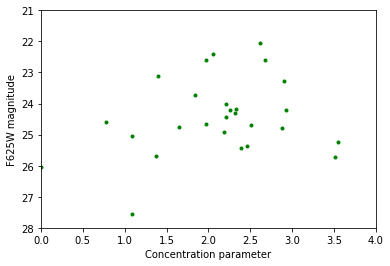

In [51]:
# Plots the concentration parameter vs magnitude
plt.plot(concentration, info[:,41], 'g.')
plt.xlabel('Concentration parameter')
plt.ylabel('F625W magnitude')
plt.xlim(0,4)
plt.ylim(28,21)

In [58]:
# Cut out clusters (identified as objects with concentration parameter < 2.3, from Chandar et. al. 2010)
new_info = np.zeros(info.shape)
for i in range(47):
    if (concentration[i] < 2.3): # & (concentration[i] >= 0):
        new_info[i] = info[i]
new_info = new_info[~np.all(new_info == 0, axis=1)]

In [19]:
np.savetxt("New_Start(2017)/sn2010ae_NoClustersROI.reg", new_info[:,2:4], '%5.2f')

In [70]:
asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010ae_NoClustersROI_133pc.reg", "r+")
text = asci.readlines()
region = np.zeros([47,2])

for i in range(14):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

new_info1 = np.copy(new_info) # Will hold stars within 200 parsecs
new_info2 = np.zeros([region.shape[0], new_info.shape[1]]) # Will hold stars within 133 parsecs
new_info3 = np.zeros([region.shape[0], new_info.shape[1]]) # Will hold stars within 67 parsecs

j = 0 # Iteration variable for region array
for i in range(new_info1.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info1[i][2])&(region[j][1] == new_info1[i][3]):
        new_info2[j] = new_info1[i]
        j = j + 1
        if j == region.shape[0]: break

asci = open("/Users/tktakaro/Documents/Type-Iax-HST/machine_learning/New_Start(2017)/sn2010ae_NoClustersROI_67pc.reg", "r+")
text = asci.readlines()
region = np.zeros([14,2])

for i in range(3):
    region[i][0] = mysplit(text[i])[0]
    region[i][1] = mysplit(text[i])[1]
region = region[~np.all(region == 0, axis=1)]

j = 0 # Iteration variable for region array
for i in range(new_info1.shape[0]): # Cycles through each star predicted above
    if (region[j][0] == new_info1[i][2])&(region[j][1] == new_info1[i][3]):
        new_info3[j] = new_info1[i]
        j = j + 1
        if j == region.shape[0]: break
                
                
for i in range(new_info1.shape[0]):
    for j in range(new_info2.shape[0]):
        if np.array_equal(new_info1[i],new_info2[j]):
            new_info1[i] = np.zeros(new_info1[i].size)
for i in range(new_info2.shape[0]):
    for j in range(new_info3.shape[0]):
        if np.array_equal(new_info2[i],new_info3[j]):
            new_info2[i] = np.zeros(new_info2[i].size)
            
new_info1 = new_info1[~np.all(new_info1 == 0, axis=1)]
new_info2 = new_info2[~np.all(new_info2 == 0, axis=1)]
new_info3 = new_info3[~np.all(new_info3 == 0, axis=1)]

In [71]:
# Reddening, metallicity, and distance errors
dist_lower = 5 * (np.log10(10.1117e6) - 1)
dist_upper = 5 * (np.log10(12.1569e6) - 1)
red_lower = .18
red_upper = .92
metal_lower = -0.75
metal_upper = -0.75

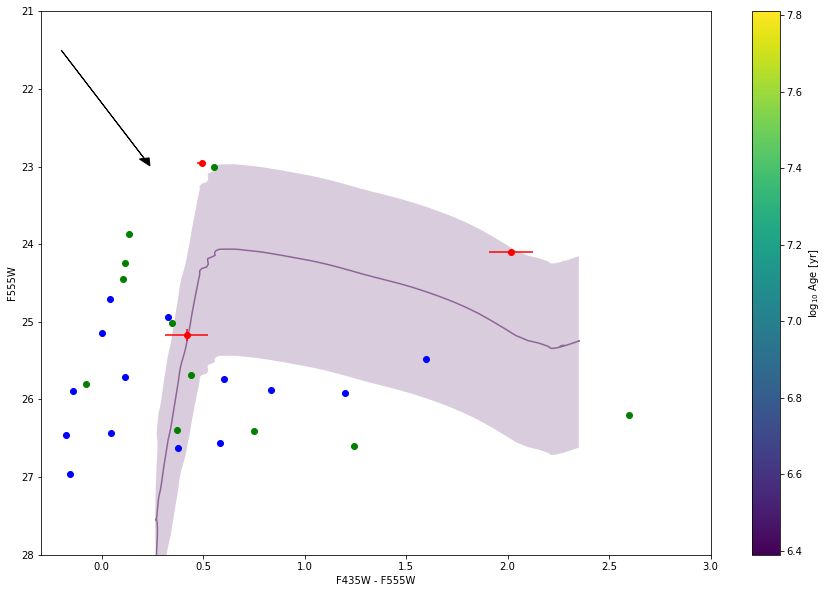

In [72]:
# fix metallicity, vary age
df = isochrones[-0.75]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

ages = ages[(ages > 7.1) & (ages < 7.15)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Three adjustments: 1. Distance: added to mag 2. MW Extinction: added to both. 3. Galactic extinction
    dist_adjust = 5 * (np.log10(11.0873e6) - 1)
    F435W_ext = .509 # extinction in F435W in ESO 162-17 from NED
    F555W_ext = .394 # extinction in F555W in ESO 162-17 from NED
    Gal_ext = .50 # (B - V) galactic extinction from Stritzinger et.al. 2013
    # Multiply Gal_ext by A_lambda/E(B-V) values from Schlafly, Finkbeiner 2011
    mag = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_lower = df[idx].ACS_WFC_F555W + dist_lower + F555W_ext + 2.792*red_lower
    mag_upper = df[idx].ACS_WFC_F555W + dist_upper + F555W_ext + 2.792*red_upper
    color = df[idx].ACS_WFC_F435W - df[idx].ACS_WFC_F555W  + F435W_ext - F555W_ext + (3.610 - 2.792) * Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(new_info3[:,15] - new_info3[:,28], new_info3[:,28], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,17]**2 + new_info3[:,30]**2), yerr=new_info3[:,30])
#line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
#                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
line2 = plt.plot(new_info2[:,15] - new_info2[:,28], new_info2[:,28], 'go')
#line3 = plt.errorbar(new_info[:,15] - new_info[:,28], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,17]**2 + new_info[:,30]**2), yerr=new_info[:,30])
line3 = plt.plot(new_info1[:,15] - new_info1[:,28], new_info1[:,28], 'bo')

# Plots reddening vector
plt.arrow(-.2, 21.5, (3.610 - 2.792)*Gal_ext, 2.792*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')


plt.xlabel("F435W - F555W")
plt.ylabel("F555W")
plt.ylim(28,21)
plt.xlim(-.3, 3)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')
plt.draw()
plt.show()

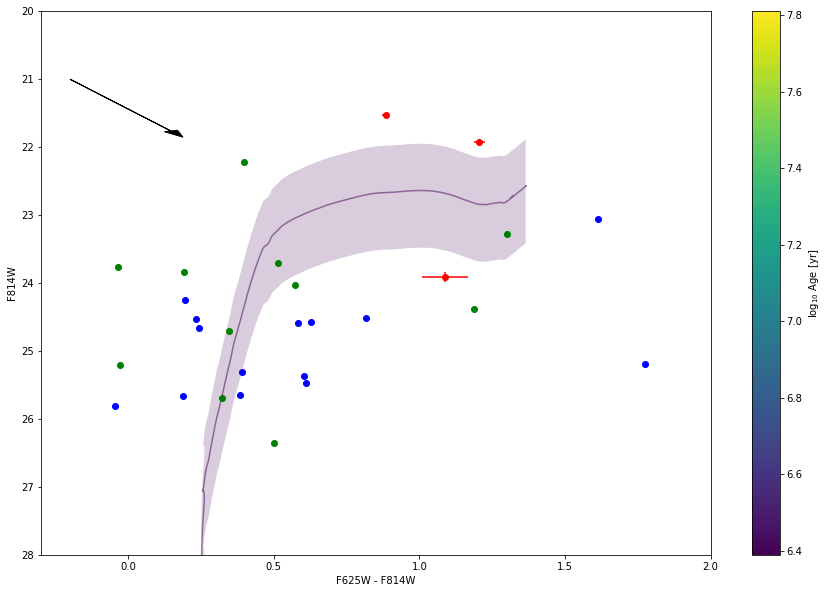

In [73]:
# fix metallicity, vary age
df = isochrones[-0.75]
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()

age_cmd = {}

#ages = ages[(np.log10(5e8) < ages) & (ages < np.log10(14e9))]
ages = ages[(ages > 7.1) & (ages < 7.15)]
for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    # Two adjustments: 1. Distance: added to mag 2. Extinction: added to both.
    F625W_ext = .313 # extinction in F625W in ESO 162-17 from NED
    F814W_ext = .215 # extinction in F814W in ESO 162-17 from NED
    mag = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    mag_lower = df[idx].ACS_WFC_F814W + dist_lower + F814W_ext + 1.526*red_lower
    mag_upper = df[idx].ACS_WFC_F814W + dist_upper + F814W_ext + 1.526*red_upper
    color = df[idx].ACS_WFC_F625W - df[idx].ACS_WFC_F814W + F625W_ext - F814W_ext + (2.219 - 1.526)*Gal_ext
    age_cmd[age] = (color, mag, mag_lower, mag_upper)

norm = mpl.colors.Normalize(vmin=ages.min(), vmax=ages.max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')
sm.set_array(ages)
plt.subplots(figsize=(15, 10))
for age, (color, mag, mag_lower, mag_upper) in age_cmd.items():
    plt.plot(color, mag, alpha=0.5, color=sm.to_rgba(age), zorder=0)
    plt.fill_between(color, mag_lower, mag_upper, facecolor=sm.to_rgba(age), alpha=0.2, edgecolor='none')
    
# Plots stars
line1 = plt.errorbar(new_info3[:,41] - new_info3[:,54], new_info3[:,54], fmt='ro', 
                     xerr=np.sqrt(new_info3[:,43]**2 + new_info3[:,56]**2), yerr=new_info3[:,30])
#line2 = plt.errorbar(new_info2[:,15] - new_info2[:,28], new_info2[:,28], fmt='go', 
#                     xerr=np.sqrt(new_info2[:,17]**2 + new_info2[:,30]**2), yerr=new_info2[:,30])
line2 = plt.plot(new_info2[:,41] - new_info2[:,54], new_info2[:,54], 'go')
#line3 = plt.errorbar(new_info[:,15] - new_info[:,28], new_info[:,28], fmt='bo', 
#                     xerr=np.sqrt(new_info[:,17]**2 + new_info[:,30]**2), yerr=new_info[:,30])
line3 = plt.plot(new_info1[:,41] - new_info1[:,54], new_info1[:,54], 'bo')

# Plots reddening vector
plt.arrow(-.2, 21, (2.219 - 1.526)*Gal_ext, 1.526*Gal_ext, head_width=0.05, head_length=0.1, fc='k', ec='k')

plt.xlabel("F625W - F814W")
plt.ylabel("F814W")
plt.ylim(28,20)
plt.xlim(-.3, 2)
cb = plt.colorbar(sm)
cb.set_label('$\log_{10}$ Age [yr]')

## Crappy Chi-squared Test

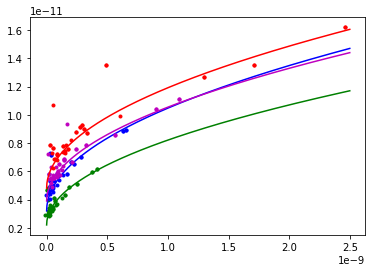

In [75]:
# Testing to find relationship between flux and flux error
from scipy.optimize import curve_fit
# This is the function which will be fed to the fitting algorithm.
def fluxerror(x, a, b):
    return a + b * np.sqrt(x)

x_array=np.linspace(0, 2.5e-9, num=1000)

plt.plot(new_info[:,13], new_info[:,14], 'g.')
plt.plot(x_array, 2.2e-12 + 1.9e-7*x_array**(1/2), 'g-')
plt.plot(new_info[:,26], new_info[:,27], 'b.')
plt.plot(x_array, 3.2e-12 + 2.3e-7*x_array**(1/2), 'b-')
plt.plot(new_info[:,39], new_info[:,40], 'm.')
plt.plot(x_array, 3.9e-12 + 2.1e-7*np.sqrt(x_array), 'm-')
plt.plot(new_info[:,52], new_info[:,53], 'r.')
plt.plot(x_array, 4.8e-12 + 2.25e-7*np.sqrt(x_array), 'r-')

In [77]:
# For now, setup Salpeter IMF, because it's less likely to fail than Kroupa.
import scipy.integrate as integrate

def SalpeterUnNorm(m):
    return m**-2.35
def invSalpeter(u, lower, upper):
    norm = integrate.quad(SalpeterUnNorm, lower, upper)[0] # To go back to how it was, replace the 6's with .075's
    return (lower**(-1.35) - 1.35 * norm * u)**(-1/1.35)

In [28]:
from scipy.optimize import curve_fit
from scipy.stats import skewnorm
# This is the function which will be fed to the fitting algorithm.
def skew(x, norm, a, loc, scale):
    return norm * skewnorm.pdf(x, a, loc=loc, scale=scale)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:41: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


There are  28.0 stars above signal-to-noise of 10, and  0.0 stars below.


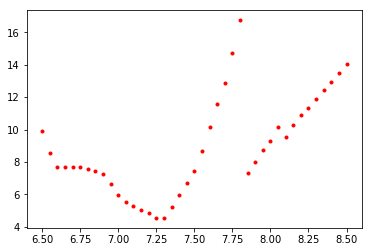

In [83]:
# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages >= 6.5) & (ages <= 8.5)]

for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_625, mag_814) #(color, mag, mag_lower, mag_upper)
n_ages = i + 1


SN_pos = np.array([1791.1695, 1924.3393])

CChi = np.zeros([2,n_ages]) # This is the array which measure crappy chi-squared across all filters
k = 0
n10SN = 0
nlow = 0
for age, (mag_435, mag_555, mag_625, mag_814) in age_cmd.items():
    phys_dist_temp = 0 # This will hold the total physical distance weights to be averaged and divided out to normalize
    temp = 0 # This will hold the distance for each data point to the line
    
    # Sets the radial dispersion for the region
    sigma = (.92 * 10**age * 3.15e7 * 206265)/(11.09e6 * 3.086e13 * .05) # Replace 10**age w/ 10000000
    flat = (100 * 206265)/(11.09e6 * .05) # 100 parsecs in pixels
    flat_int = int(np.round(flat*10))
    for j in range(new_info.shape[0]):
        # Removes "stars" with mag > 90 in any band
        if (new_info[j,15] > 90) or (new_info[j,28] > 90) or (new_info[j,41] > 90) or (new_info[j,54] > 90):
            continue
        if new_info[j,5] >= 10:
            n10SN += 1
        else: nlow += 1
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info[j,2])**2 + (SN_pos[1] - new_info[j,3])**2)
        weight_func = np.convolve(1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- np.linspace(-100,100,1000)**2/(2 * sigma**2)),
               np.append(np.zeros(np.ceil(1000-flat_int)),np.append(np.ones(flat_int),np.zeros(np.floor(1000-flat_int)))))
        phys_dist_weight = weight_func[1000 + int(phys_dist*2.5)]
        phys_dist_temp += phys_dist_weight # Will be used to compute average of the weights
        
        # Adds the difference in mags for each data point in quadrature.
        #temp += phys_dist_weight * np.amin((new_info[j,15] - mag_435)**2/mag_435 + (new_info[j,28] - mag_555)**2/mag_555
        #                + (new_info[j,41] - mag_625)**2/mag_625 + (new_info[j,54] - mag_814)**2/mag_814)
        temp += (phys_dist_weight * np.amin(np.sqrt((new_info[j,15] - mag_435)**2
          + (new_info[j,28] - mag_555)**2 + (new_info[j,41] - mag_625)**2 + (new_info[j,54] - mag_814)**2)))**2
    
    # There is one star removed not counted, as they have >90 mag in some filter
    phys_dist_temp /= (new_info.shape[0] - 1)
    CChi[0,k] = age
    CChi[1,k] = np.sqrt(temp)/phys_dist_temp
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi = CChi.T[CChi.T[:,0].argsort()]
plt.plot(CChi.T[0], CChi.T[1], 'r.')
print("There are ", n10SN/n_ages, "stars above signal-to-noise of 10, and ", nlow/n_ages, "stars below.")

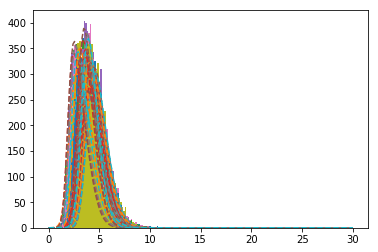

In [84]:
# This cell and the one below are for run fit in magnitude space.
ages = ages[(ages < 8.21)]

x = np.linspace(0,30,200)
probs = []
for i, age in enumerate(ages):
    filename="MC_10ae_MagFit/CChi_false_{Age}.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 4, 3, 3))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs.append(skew(CChi[i,1], *popt)/norm)

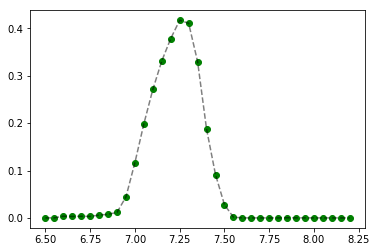

In [85]:
plt.plot(CChi[:35,0], probs, 'go')
plt.plot(CChi[:35,0], probs, 'k--', alpha=.5)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:38: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


There are  29.0 stars above signal-to-noise of 10, and  0.0 stars below.


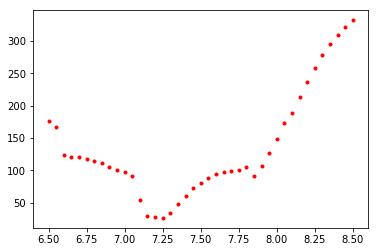

In [87]:
# Reruns through the isochrones the user specifies to get mags, colors, etc.
ages = np.array(list(set(df.log10_isochrone_age_yr)))
ages.sort()
ages = ages[(ages >= 6.5) & (ages <= 8.5)]

for i, age in enumerate(ages):
    idx = df.log10_isochrone_age_yr == age
    mag_435 = df[idx].ACS_WFC_F435W + dist_adjust + F435W_ext + 3.610*Gal_ext
    mag_555 = df[idx].ACS_WFC_F555W + dist_adjust + F555W_ext + 2.792*Gal_ext
    mag_625 = df[idx].ACS_WFC_F625W + dist_adjust + F625W_ext + 2.219*Gal_ext
    mag_814 = df[idx].ACS_WFC_F814W + dist_adjust + F814W_ext + 1.526*Gal_ext
    age_cmd[age] = (mag_435, mag_555, mag_625, mag_814) #(color, mag, mag_lower, mag_upper)
n_ages = i + 1


SN_pos = np.array([1791.1695, 1924.3393])

CChi = np.zeros([2,n_ages]) # This is the array which measure crappy chi-squared across all filters
k = 0
n10SN = 0
nlow = 0
for age, (mag_435, mag_555, mag_625, mag_814) in age_cmd.items():
    phys_dist_temp = 0 # This will hold the total physical distance weights to be averaged and divided out to normalize
    temp = 0 # This will hold the distance for each data point to the line
    
    # Sets the radial dispersion for the region
    sigma = (.92 * 10**age * 3.15e7 * 206265)/(11.09e6 * 3.086e13 * .05) # Replace 10**age w/ 10000000
    flat = (100 * 206265)/(11.09e6 * .05) # 100 parsecs in pixels
    flat_int = int(np.round(flat*5))
    for j in range(new_info.shape[0]):
        if new_info[j,5] >= 10:
            n10SN += 1
        else: nlow += 1
        
        # Uses physical distance between star and SN position to weight each star
        phys_dist = np.sqrt((SN_pos[0] - new_info[j,2])**2 + (SN_pos[1] - new_info[j,3])**2)
        weight_func = np.convolve(1/(np.sqrt(2 * np.pi) * sigma) * np.exp(- np.linspace(-100,100,1000)**2/(2 * sigma**2)),
               np.append(np.zeros(np.ceil(1000-flat_int)),np.append(np.ones(flat_int),np.zeros(np.floor(1000-flat_int)))))
        phys_dist_weight = weight_func[1000 + int(phys_dist*5)]
        phys_dist_temp += phys_dist_weight # Will be used to compute average of the weights
        
        # Adds the difference in mags for each data point in quadrature.
        flux = np.array([10**(-.4 * new_info[j,15]), 10**(-.4 * new_info[j,28]), 10**(-.4 * new_info[j,41]),
                        10**(-.4 * new_info[j,54])])
        #temp += phys_dist_weight * np.amin((flux[0] - 10**(-.4*mag_435))**2/10**(-.4*mag_435) + (flux[1] - 10**(-.4*mag_555))**2/10**(-.4*mag_555)
        #            + (flux[2] - 10**(-.4*mag_625))**2/10**(-.4*mag_625) + (flux[3] - 10**(-.4*mag_814))**2/10**(-.4*mag_814))
        temp += (phys_dist_weight * np.amin(np.sqrt((flux[0] - 10**(-.4*mag_435))**2 + (flux[1] - 10**(-.4*mag_555))**2
                                            + (flux[2] - 10**(-.4*mag_625))**2 + (flux[3] - 10**(-.4*mag_814))**2)))**2
    
    phys_dist_temp /= (new_info.shape[0])
    CChi[0,k] = age
    CChi[1,k] = 1e11 * np.sqrt(temp)/phys_dist_temp
    k = k + 1
    
# Ensures that the crappy chi-squared arrays are ordered by age for convenience.
CChi = CChi.T[CChi.T[:,0].argsort()]
plt.plot(CChi.T[0], CChi.T[1], 'r.')
print("There are ", n10SN/n_ages, "stars above signal-to-noise of 10, and ", nlow/n_ages, "stars below.")

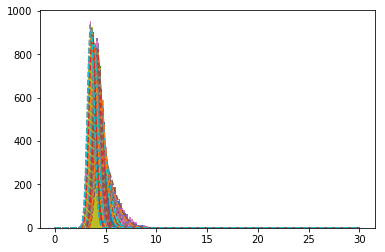

In [250]:
# This cell and the one below are for full run with the fit in flux space.
ages = ages[(ages < 8.21)]

x = np.linspace(0,30,200)
probs = []
for i, age in enumerate(ages):
    filename="Monte_Carlo_Files_7/CChi_false_{Age}.npy".format(Age=np.round(age,decimals=2))
    CChi_false = np.load(filename)
    CChi_false[1,:] = 1e11 * CChi_false[1,:]
    y = plt.hist(CChi_false[1,:], bins=np.linspace(0,30,201))[0]
    popt, pcov = curve_fit(skew, x, y, p0=(2000, 3, 2, 2))
    plt.plot(x, skew(x, *popt), '--')
    norm = integrate.quad(skew, 0, 30, args=(popt[0], popt[1], popt[2], popt[3]))[0]
    probs.append(skew(CChi[i,1], *popt)/norm)

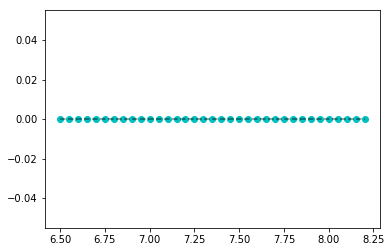

In [251]:
plt.plot(CChi[:35,0], probs, 'co')
plt.plot(CChi[:35,0], probs, 'k--', alpha=.5)